In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

mat = pd.read_csv('mat.csv')

import networkx as nx

mat = mat.set_index('ticker').T

df = mat.stack().reset_index()

In [7]:
df['ordered-cols'] = df.apply(lambda x: '-'.join(sorted([x['level_0'],x['ticker']])),axis=1)
df = df.drop_duplicates(['ordered-cols'])
df.drop(['ordered-cols'], axis=1, inplace=True)

df.columns = ['v1','v2','w']

import networkx as nx

tuples = [tuple(x) for x in df.values]


g = nx.Graph()
for line in tuples:
    g.add_edge(line[0],line[1], weight =line[2])

degree_centrality = nx.degree_centrality(g)
degree_centrality = pd.DataFrame.from_dict(degree_centrality, orient='index')
degree_centrality.columns = ['dc']
degree_centrality.sort_values(by = ['dc'], ascending = False)[:100]
#print('Average degree centrality',mean(degree_centrality['dc']))
print('Max degree centrality', max(degree_centrality['dc']))
print('Mine degree centrality', min(degree_centrality['dc']))


KeyboardInterrupt: 

# Implementation


In [50]:
import networkx as nx
stocks = mat.index.values
cor_matrix = np.asmatrix(mat)
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)
#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])


In [51]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 



In [52]:

#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in list(G.edges(data=True)):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    return H

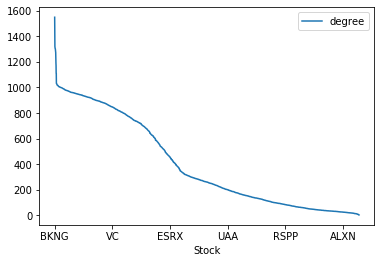

In [53]:
G7 = create_corr_network_5(G, 'positive',.7)

G7D = pd.DataFrame((dict(G7.degree).items()), columns = ['Stock','degree'])
G7D = G7D.set_index('Stock')
G7D = G7D.sort_values(by = ['degree'], ascending = False)
G7D.plot()

In [54]:
#nodes
print("Number of Nodes", len(G7.nodes()))
#edges
print("Number of Edges", len(G7.edges()))
#average degree
print("Average Degree", G7D.mean())
#clustering coefficient

#cliques
a =G7.edges(data= True)

Number of Nodes 2641
Number of Edges 528126
Average Degree degree    399.943961
dtype: float64


In [55]:
#a = list(nx.find_cliques_recursive(G7))

# Power Law For threshold 0.7 

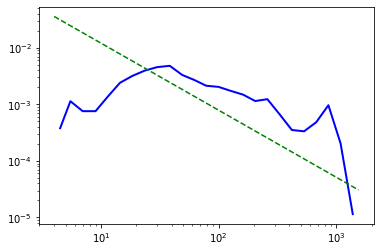

In [56]:
degree_sequence = sorted([d for n, d in G7.degree()], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin  =1 ) 
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

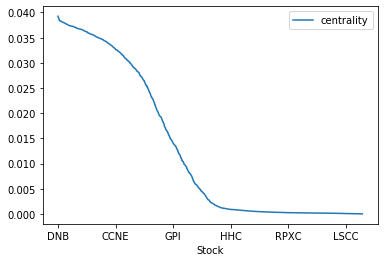

In [57]:
G7_eig = pd.DataFrame((dict(nx.eigenvector_centrality(G7)).items()), columns = ['Stock','centrality'])
G7_eig = G7_eig.set_index('Stock')
G7_eig = G7_eig.sort_values(by = ['centrality'], ascending = False)
G7_eig.plot()

In [58]:
G7_bet = pd.DataFrame((dict(nx.betweenness_centrality(G7)).items()), columns = ['Stock','between'])


KeyboardInterrupt: 

In [ ]:
G7_bet.columns

In [ ]:
G7_bet = G7_bet.set_index('Stock')
G7_bet = G7_bet.sort_values(by = ['between'], ascending = False)
G7_bet.plot()

In [59]:
import plotly.express as px



In [30]:
G7_bet

between
Stock              
BKNG   6.910138e-02
HEOP   4.343125e-02
MENT   4.086248e-02
MBRG   4.006096e-02
ALTR   3.599498e-02
...             ...
GHDX   2.083614e-09
AES    1.479738e-09
SAIC   0.000000e+00
ASC    0.000000e+00
BG     0.000000e+00

[2641 rows x 1 columns]

# Threshold 0.4

In [60]:
G4 = create_corr_network_5(G, 'positive',.4)

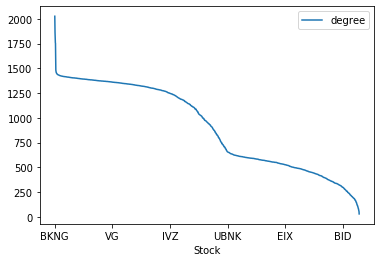

In [61]:

G4D = pd.DataFrame((dict(G4.degree).items()), columns = ['Stock','degree'])
G4D = G4D.set_index('Stock')
G4D = G4D.sort_values(by = ['degree'], ascending = False)
G4D.plot()

In [46]:
G4_eig = pd.DataFrame(dict(nx.eigenvector_centrality(G4)).items(), columns = ['Stock','centrality'])
G4_eig = G7_eig.set_index('Stock')
G4_eig = G7_eig.sort_values(by = ['centrality'], ascending = False)
#G4_eig.plot()

KeyError: "None of ['Stock'] are in the columns"

In [ ]:
G7_bet = pd.DataFrame((dict(nx.betweenness_centrality(G7)).items()), columns = ['Stock','between'])
G7_bet = G7_bet.set_index('Stock')
G7_bet = G7_bet.sort_values(by = ['between'], ascending = False)
G7_bet.plot()

# Power law threshold .4

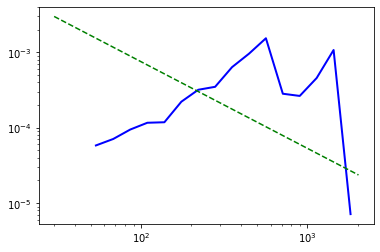

In [62]:
degree_sequence = sorted([d for n, d in G4.degree()], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin  =1 ) 
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

# Threshold .2 

In [63]:
G2 = create_corr_network_5(G, 'positive',.2)

In [ ]:

G2D = pd.DataFrame((dict(G2.degree).items()), columns = ['Stock','degree'])
G2D = G2D.set_index('Stock')
G2D = G2D.sort_values(by = ['degree'], ascending = False)
G2D.plot()

In [ ]:
G2_eig = pd.DataFrame((dict(nx.eigenvector_centrality(G2)).items()), columns = ['Stock','centrality'])
G2_eig = G2_eig.set_index('Stock')
G2_eig = G2_eig.sort_values(by = ['centrality'], ascending = False)
G2_eig.plot()

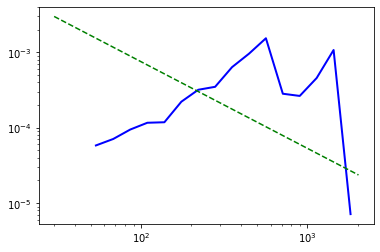

In [64]:
degree_sequence = sorted([d for n, d in G4.degree()], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin  =1 ) 
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

# Theshold .9

In [65]:
G9 = create_corr_network_5(G, 'positive',.9)

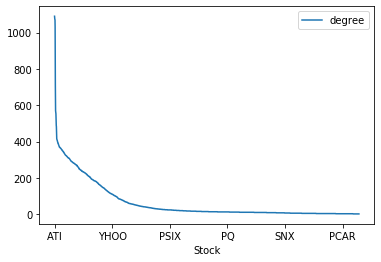

In [66]:

G9D = pd.DataFrame((dict(G9.degree).items()), columns = ['Stock','degree'])
G9D = G9D.set_index('Stock')
G9D = G9D.sort_values(by = ['degree'], ascending = False)
G9D.plot()

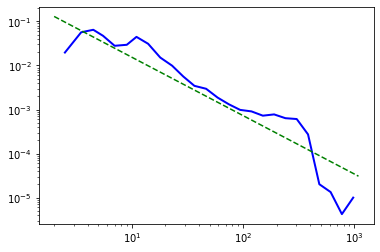

In [67]:
degree_sequence = sorted([d for n, d in G9.degree()], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin  =1 ) 
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

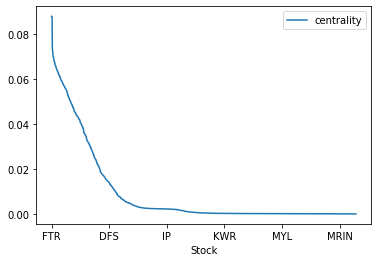

In [68]:
G9_eig = pd.DataFrame((dict(nx.eigenvector_centrality(G9)).items()), columns = ['Stock','centrality'])
G9_eig = G9_eig.set_index('Stock')
G9_eig = G9_eig.sort_values(by = ['centrality'], ascending = False)
G9_eig.plot()

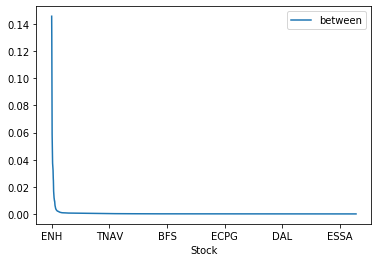

In [69]:
G9_bet = pd.DataFrame((dict(nx.betweenness_centrality(G9)).items()), columns = ['Stock','between'])
G9_bet = G9_bet.set_index('Stock')
G9_bet = G9_bet.sort_values(by = ['between'], ascending = False)
G9_bet.plot()

In [131]:
G9_bet.loc['FTR']

between    0.032321
Name: FTR, dtype: float64

In [134]:
#G9_bet
G9_eig['between'] = np.nan
for i in G9_eig.index:
    G9_eig.loc[i]['between'] = G9_bet.loc[i]
    

In [70]:
data = pd.read_csv('WIKI.csv')

data = data[['date','ticker','adj_close']]

data = data.pivot(index = 'date' , columns = 'ticker', values = 'adj_close')

data = data.loc['2017-03-27':]

#data = data.dropna(axis = 0, thresh = 10000)
#data = data.dropna(axis = 1, thresh = 10000)


In [71]:
data

ticker              A     AA        AAL     AAMC        AAN   AAOI       AAON  \
date                                                                            
2017-03-27  52.880850  32.47  41.563513  61.5000  28.781565  59.88  34.924234   
2017-03-28  53.079500  32.92  42.419877  67.9500  29.001272  58.56  34.675131   
2017-03-29  52.761659  32.91  41.782583  68.5000  29.260925  58.02  34.824593   
2017-03-30  52.960310  33.49  42.360130  74.9999  29.810192  55.35  35.123516   
2017-03-31  52.644455  34.40  42.121145  75.2500  29.700338  56.15  35.223158   
...               ...    ...        ...      ...        ...    ...        ...   
2018-03-21  69.400000  47.95  54.090000  60.8000  47.370000  26.71  39.050000   
2018-03-22  67.470000  44.92  52.310000  60.1800  45.940000  25.96  38.550000   
2018-03-23  66.060000  44.71  51.010000  58.3500  45.300000  25.36  37.200000   
2018-03-26  68.200000  45.77  51.860000  58.6000  46.230000  24.53  37.950000   
2018-03-27  67.000000  44.90  50.900000  65.2500  45.420000  24.60  38.000000   

ticker             AAP        AAPL        AAT  ...  ZIOP  ZIXI  ZLC   ZLTQ  \
date                                           ...                           
2017-03-27  147.631650  139.738852  40.856954  ...  6.69  4.68  NaN  55.78   
2017-03-28  148.191012  142.635200  40.768091  ...  6.62  4.69  NaN  55.84   
2017-03-29  149.499520  142.952608  40.659482  ...  6.69  4.68  NaN  55.69   
2017-03-30  148.500659  142.764147  41.044552  ...  6.45  4.74  NaN  55.77   
2017-03-31  148.091126  142.496334  41.311139  ...  6.34  4.81  NaN  55.61   
...                ...         ...        ...  ...   ...   ...  ...    ...   
2018-03-21  115.240000  171.270000  32.460000  ...  4.28  4.53  NaN    NaN   
2018-03-22  111.710000  168.845000  32.520000  ...  4.19  4.52  NaN    NaN   
2018-03-23  110.840000  164.940000  31.780000  ...  4.05  4.40  NaN    NaN   
2018-03-26  114.770000  172.770000  32.220000  ...  4.27  4.42  NaN    NaN   
2018-03-27  115.010000  168.340000  32.750000  ...  4.05  4.39  NaN    NaN   

ticker      ZMH  ZNGA   ZOES  ZQK        ZTS   ZUMZ  
date                                                 
2017-03-27  NaN  2.81  17.35  NaN  53.771458  17.35  
2017-03-28  NaN  2.82  17.87  NaN  53.960759  17.75  
2017-03-29  NaN  2.83  18.52  NaN  53.622010  18.25  
2017-03-30  NaN  2.88  18.32  NaN  53.273298  18.40  
2017-03-31  NaN  2.85  18.50  NaN  53.173666  18.30  
...         ...   ...    ...  ...        ...    ...  
2018-03-21  NaN  3.94  15.66  NaN  84.100000  23.95  
2018-03-22  NaN  3.81  15.27  NaN  82.060000  23.35  
2018-03-23  NaN  3.80  15.12  NaN  80.600000  23.55  
2018-03-26  NaN  3.85  15.10  NaN  83.730000  24.65  
2018-03-27  NaN  3.70  14.88  NaN  81.860000  23.60  

[253 rows x 3199 columns]

# Retrun analysis

In [72]:
G9_eig['return'] = np.nan
G9_eig

centrality  return
Stock                      
FTR    8.809818e-02     NaN
ATI    8.804135e-02     NaN
FSLR   8.802899e-02     NaN
URBN   8.795071e-02     NaN
DNB    8.792705e-02     NaN
...             ...     ...
AVHI   3.678526e-23     NaN
ESSA   3.678526e-23     NaN
MDLZ   3.678526e-23     NaN
UTHR   3.678526e-23     NaN
CHUY   3.678526e-23     NaN

[2641 rows x 2 columns]

In [73]:
for i in G9_eig.index:
    temp = data[i].dropna()
    G9_eig['return'].loc[i] = ((temp[-1] - temp[0])/temp.iloc[0])*100

In [74]:

xp = G9_eig['centrality']
yp= G9_eig['return']



In [174]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
import plotly.express as px

In [224]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"


fig = G9_eig.plot.scatter(x='return', y= 'centrality')
fig.show()

In [77]:
yp.hist()

# Sharpe Ratio Analysis

In [78]:
G9_eig['std'] = np.nan


In [79]:
for i in G9_eig.index:
    G9_eig['std'].loc[i] = data[i].std()

In [223]:
pd.options.plotting.backend = "plotly"


fig = G9_eig.plot.scatter(y ='centrality', x= 'std')
fig.show()

In [99]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [120]:
G9_eig['std_norm'] = np.nan

In [121]:
mean_std = G9_eig['std'].mean()
std_std = G9_eig['std'].std()

In [122]:
for i in G9_eig.index:
    G9_eig['std_norm'].loc[i] = (G9_eig['std'].loc[i] - mean_std)/std_std

In [123]:
G9_eig['sharpe']= np.nan

In [124]:
#sharpe ratio
for i in G9_eig.index:
    r = G9_eig['return'].loc[i]
    st = G9_eig['std'].loc[i]
    #sharpe ratio = Return - risk free return ( 1 year treasurey build) / std of Return asset
    G9_eig['sharpe'].loc[i] = (r-1)/st

In [125]:
G9_eig

centrality      return        std  std_norm      sharpe  degree
Stock                                                                   
FTR    8.809818e-02  298.514851   2.210301 -0.028013  134.603793  1070.0
ATI    8.804135e-02   63.219741   3.784223 -0.024532   16.441880  1090.0
FSLR   8.802899e-02  140.701382  15.436338  0.001240    9.050164  1072.0
URBN   8.795071e-02   59.715640   5.398021 -0.020962   10.877253  1075.0
DNB    8.792705e-02   23.087248   8.538408 -0.014017    2.586811  1080.0
...             ...         ...        ...       ...         ...     ...
AVHI   3.678526e-23   12.158055   1.251726 -0.030133    8.914137     2.0
ESSA   3.678526e-23    0.645399   0.616219 -0.031539   -0.575447     2.0
MDLZ   3.678526e-23   -4.688688   1.544079 -0.029486   -3.684195     2.0
UTHR   3.678526e-23  -23.693950   8.995525 -0.013006   -2.745137     2.0
CHUY   3.678526e-23  -11.363636   3.258512 -0.025695   -3.794258     2.0

[2641 rows x 6 columns]

In [217]:

fig = G9_eig.plot.scatter(x ='sharpe', y= 'centrality', color = 'degree')
fig.show()

In [221]:

fig = G9_eig.plot.scatter(x ='sharpe', y= 'between', color = 'degree')
fig.show()

In [90]:
G9_eig['degree'] = np.nan

In [91]:
for i in G9_eig.index:
    G9_eig['degree'].loc[i] = G9.degree[i]

In [92]:
max(G9_eig['std'])

23183.6479455242

In [219]:
fig = G9_eig.plot.scatter(x ='centrality', y= 'degree', color ='return')
fig.show()

In [222]:
fig = G9_eig.plot.scatter(x ='between', y= 'return', color= 'degree' )
fig.show()

In [191]:
fig = G9_eig.plot.scatter(x ='centrality', y= 'return', color = 'sharpe')
fig.show()

In [215]:
fig = G9_eig.plot.scatter(x ='return', y= 'degree')
fig.show()

In [225]:
fig = G9_eig.plot.scatter(x ='between', y= 'sharpe', color = 'degree')
fig.show()

In [226]:
fig = G9_eig.plot.scatter(x ='centrality', y= 'sharpe', color = 'degree')
fig.show()

In [231]:
fig = G9_eig.plot.scatter(x ='degree', y= 'sharpe', color = 'return')
fig.show()

In [166]:
G9_eig['return'].hist()

In [218]:

c = normalize(G9_eig['centrality'])
r = normalize(G9_eig['return'])
fig = px.scatter(x = c, y = r, color = np.log10(G9_eig['sharpe'])) 
fig.show()

In [202]:

c = np.log10(G9_eig['between'])
r = np.log10(G9_eig['return'])
fig = px.scatter(x = c, y = r, color = np.log10(G9_eig['degree'])) 
fig.show()

In [186]:
def normalize(r):
   return (r - (r).mean() )/ r.std()

In [185]:
G9_eig['centrality']

Stock
FTR     8.809818e-02
ATI     8.804135e-02
FSLR    8.802899e-02
URBN    8.795071e-02
DNB     8.792705e-02
            ...     
AVHI    3.678526e-23
ESSA    3.678526e-23
MDLZ    3.678526e-23
UTHR    3.678526e-23
CHUY    3.678526e-23
Name: centrality, Length: 2641, dtype: float64

In [187]:
normalize(G9_eig['centrality'])

Stock
FTR     4.570619
ATI     4.567342
FSLR    4.566629
URBN    4.562116
DNB     4.560752
          ...   
AVHI   -0.509205
ESSA   -0.509205
MDLZ   -0.509205
UTHR   -0.509205
CHUY   -0.509205
Name: centrality, Length: 2641, dtype: float64

In [188]:
np.log10(G9_eig['centrality'])

Stock
FTR     -1.055033
ATI     -1.055313
FSLR    -1.055374
URBN    -1.055761
DNB     -1.055878
          ...    
AVHI   -22.434326
ESSA   -22.434326
MDLZ   -22.434326
UTHR   -22.434326
CHUY   -22.434326
Name: centrality, Length: 2641, dtype: float64